In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('london_merged.csv'
                  ,parse_dates = ['timestamp'],
                  index_col = "timestamp")

In [3]:
data.shape

(17414, 9)

In [4]:
data.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [5]:
data['hour'] = data.index.hour
data['day_of_month'] = data.index.day
data['day_of_week'] = data.index.dayofweek
data['month'] = data.index.month

In [6]:
data.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day_of_month,day_of_week,month
timestamp,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,0,4,6,1
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,1,4,6,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2,4,6,1
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,3,4,6,1
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,4,4,6,1


In [7]:
# sns.lineplot(x=data.index , y="cnt" , data = data)

In [8]:
# data_by_month = data.resample("M").sum()
# plt.figure(figsize=(10,7))
# sns.lineplot(x=data_by_month.index , y="cnt" , data = data_by_month)


D:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


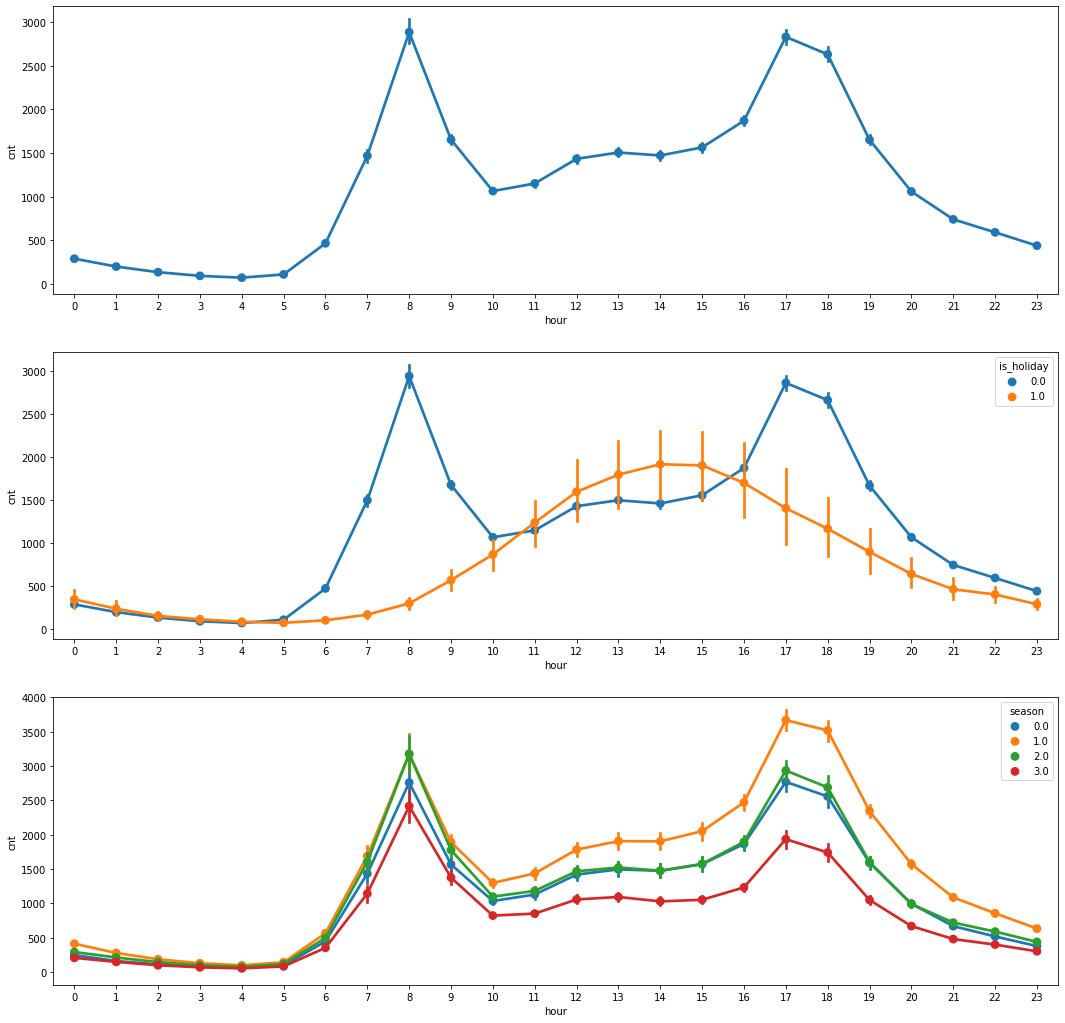

In [26]:
fig,(ax1 , ax2 , ax3) = plt.subplots(nrows=3)
fig.set_size_inches(18,18)

sns.pointplot(data=data , x='hour' , y='cnt' , ax=ax1)
sns.pointplot(data = data , x='hour' , y='cnt' , hue ='is_holiday' , ax=ax2)
sns.pointplot(data=data , x='hour' , y='cnt' ,hue = 'season' , ax=ax3)


In [10]:
# plt.figure(figsize=(10,6))
# sns.pointplot(data=data , x='hour' , y='cnt' ,hue = 'is_weekend')
# plt.show()

In [11]:
# plt.figure(figsize=(10,6))
# sns.pointplot(x=data.index.year , y='cnt' , data=data)

D:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


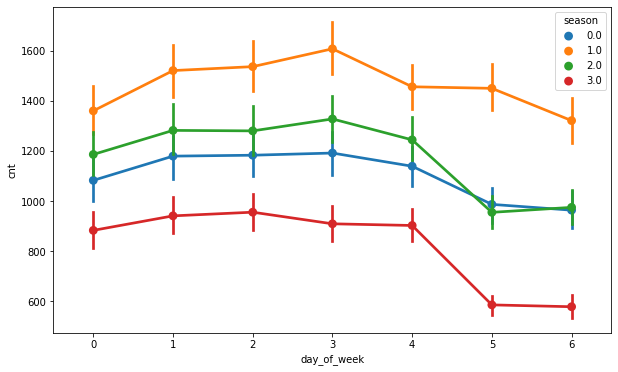

In [12]:
plt.figure(figsize=(10,6))
sns.pointplot(x='day_of_week' , y='cnt' , hue='season' ,  data = data)

In [13]:
train_size = int(len(data)*0.9)
test_size = len(data)-train_size
train,test = data.iloc[0:train_size] , data.iloc[train_size:len(data)]
print(train.shape , len(test))

(15672, 13) 1742


In [14]:
from sklearn.preprocessing import RobustScaler

columns = ['t1' , 't2' , 'hum' , 'wind_speed']

scaler = RobustScaler()
scaler_2 = RobustScaler()

scaler = scaler.fit(train[columns].values)
scaler_2 = scaler_2.fit(train[['cnt']])

train.loc[:,columns] = scaler.transform(train[columns])
train['cnt'] = scaler_2.transform(train[['cnt']])

test.loc[:,columns] = scaler.transform(test[columns])
test['cnt'] = scaler_2.transform(test[['cnt']])


D:\anaconda\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
D:\anaconda\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
D:\anaconda\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing

In [15]:
def create_dataset(X,y , timesteps):
    Xsets ,ysets = [] , []
    for i in range(len(X)-timesteps):
        v = X.iloc[i:(i+timesteps)].values
        Xsets.append(v)
        ysets.append(y.iloc[i+timesteps].values)
       
    return np.array(Xsets),np.array(ysets)

In [16]:
time_steps = 48

X_train,y_train = create_dataset(train , train[['cnt']] , time_steps)

print(X_train.shape ,y_train.shape)

(15624, 48, 13) (15624, 1)


In [17]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential

Using TensorFlow backend.


In [18]:
from keras.layers import LSTM , Bidirectional , Dropout , Dense

In [19]:
model = Sequential()
model.add(Bidirectional(LSTM(128 , input_shape = (X_train.shape[1] , X_train.shape[2]) , return_sequences = True)))
model.add(Dropout(0.4))
model.add(LSTM(units = 28))
model.add(Dropout(0.3))
model.add(Dense(units=1))
model.compile(optimizer='adam' , loss='mean_squared_error')

In [20]:
history = model.fit(X_train , y_train,
                   epochs = 15,
                   batch_size = 32 ,
                   validation_split = 0.1,
                   shuffle = False)


Train on 14061 samples, validate on 1563 samples
Epoch 1/15
14061/14061 [==============================] - 94s 7ms/step - loss: 0.3026 - val_loss: 0.1910
Epoch 2/15
14061/14061 [==============================] - 86s 6ms/step - loss: 0.1378 - val_loss: 0.0970
Epoch 3/15
14061/14061 [==============================] - 88s 6ms/step - loss: 0.0861 - val_loss: 0.0547
Epoch 4/15
14061/14061 [==============================] - 92s 7ms/step - loss: 0.0665 - val_loss: 0.0548
Epoch 5/15
14061/14061 [==============================] - 107s 8ms/step - loss: 0.0537 - val_loss: 0.0534
Epoch 6/15
14061/14061 [==============================] - 123s 9ms/step - loss: 0.0471 - val_loss: 0.0575
Epoch 7/15
14061/14061 [==============================] - 120s 9ms/step - loss: 0.0429 - val_loss: 0.0326
Epoch 8/15
14061/14061 [==============================] - 122s 9ms/step - loss: 0.0407 - val_loss: 0.0325
Epoch 9/15
14061/14061 [==============================] - 142s 10ms/step - loss: 0.0391 - val_loss: 0.0349

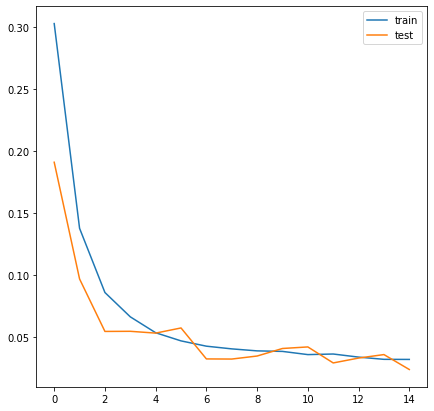

In [21]:
plt.figure(figsize=(7,7))
plt.plot(history.history['loss'] , label = 'train')
plt.plot(history.history['val_loss'] , label='test')
plt.legend()

In [22]:
X_test , y_test = create_dataset(test , test[['cnt']] , time_steps)
y_pred = model.predict(X_test)

In [23]:
y_test_inv = scaler_2.inverse_transform(y_test.reshape(-1,1))
y_pred_inv = scaler_2.inverse_transform(y_pred)
y_train_inv = scaler_2.inverse_transform(y_train.reshape(-1,1))

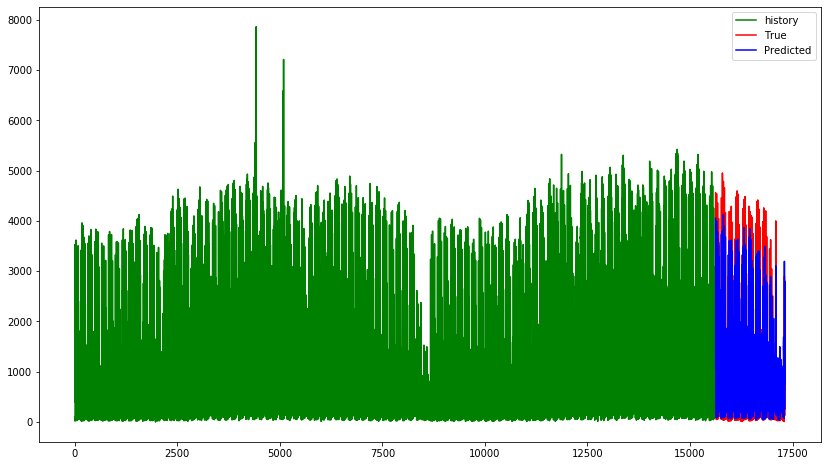

In [24]:
plt.figure(figsize=(14,8))
plt.plot(np.arange(0,len(y_train)) , y_train_inv.flatten(),'g' , label = 'history')

plt.plot(np.arange(len(y_train) , len(y_train)+len(y_test)) , y_test_inv.flatten(), 'r' , label = 'True' )
plt.plot(np.arange(len(y_train) , len(y_train)+len(y_test)) , y_pred_inv.flatten(), 'b' , label = 'Predicted' )

plt.legend()

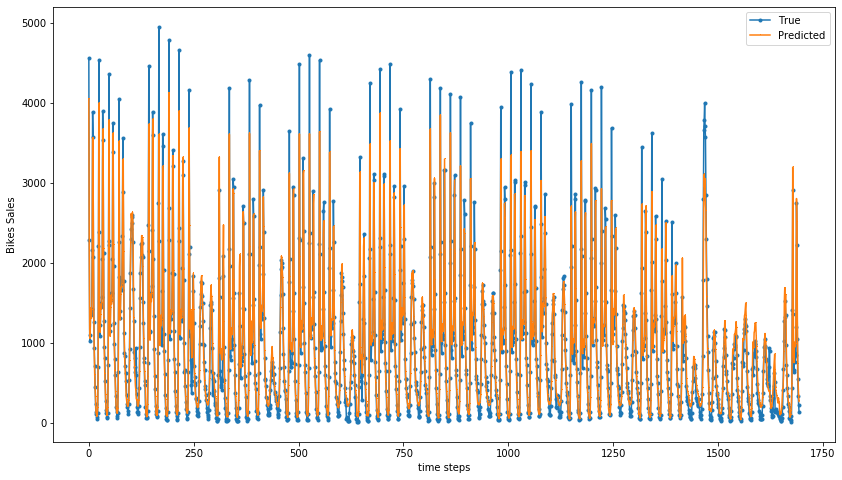

In [25]:
plt.figure(figsize=(14,8))
plt.plot(y_test_inv.flatten() , marker = '.' , label = 'True')
plt.plot(y_pred_inv.flatten() , marker = ',' , label = 'Predicted')
plt.ylabel('Bikes Sales')
plt.xlabel("time steps")
plt.legend()
plt.show();